Following this: https://www.python-course.eu/neural_network_mnist.php

Reading the MNIST data set

The images from the data set have the size 28 x 28. They are saved in the csv data files mnist_train.csv and mnist_test.csv.

Every line of these files consists of an image, i.e. 785 numbers between 0 and 255.

The first number of each line is the label, i.e. the digit which is depicted in the image. The following 784 numbers are the pixels of the 28 x 28 image.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "../mnist_data/"
train_data = np.loadtxt('https://www.python-course.eu/data/mnist/mnist_train.csv', 
                        delimiter=",")
test_data = np.loadtxt('https://www.python-course.eu/data/mnist/mnist_test.csv', 
                       delimiter=",") 
test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [8]:
test_data[test_data==255]
test_data.shape

(10000, 785)

The images of the MNIST dataset are greyscale and the pixels range between 0 and 255 including both bounding values. We will map these values into an interval from [0.01, 1] by multiplying each pixel by 0.99 / 255 and adding 0.01 to the result. This way, we avoid 0 values as inputs, which are capable of preventing weight updates, as we we seen in the introductory chapter.

In [9]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

We need the labels in our calculations in a one-hot representation. We have 10 digits from 0 to 9, i.e. lr = np.arange(10).

Turning a label into one-hot representation can be achieved with the command: (lr==label).astype(np.int)

We demonstrate this in the following:

In [10]:
import numpy as np

lr = np.arange(10)

for label in range(10):
    one_hot = (lr==label).astype(int)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


We are ready now to turn our labelled images into one-hot representations. Instead of zeroes and one, we create 0.01 and 0.99, which will be better for our calculations:

In [11]:
lr = np.arange(no_of_different_labels)

# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(float)
test_labels_one_hot = (lr==test_labels).astype(float)

# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

Before we start using the MNIST data sets with our neural network, we will have a look at some images:

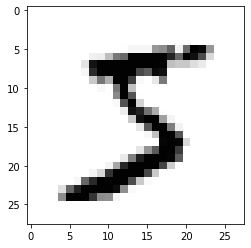

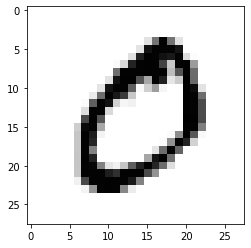

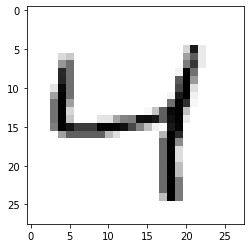

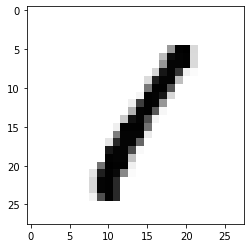

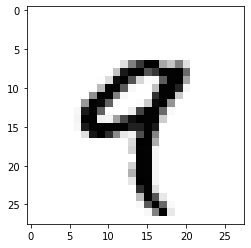

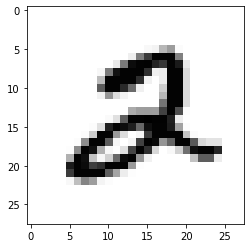

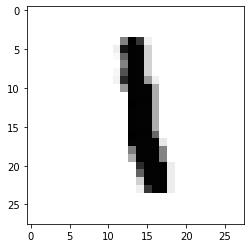

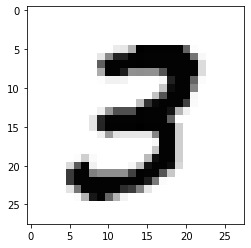

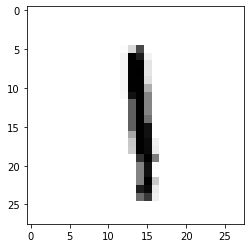

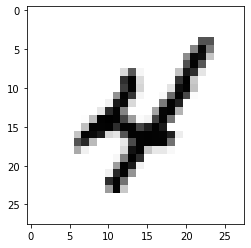

In [12]:
for i in range(10):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()